In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras import models, layers
from sklearn.model_selection import GridSearchCV

In [2]:
covtype_Data = pd.read_csv('covtype.data',sep=",",header=None)
#covtype_Data_gz.describe()

In [3]:
#covtype_Data_gz = pd.read_csv('covtype.data.gz',sep=",",header=None)

In [4]:
covtype_Data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

In [5]:
covtype_Data[54].unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [6]:
covtype_Data.loc[:,:9].head()

,0,1,2,3,4,5,6,7,8,9
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


In [7]:
covtype_Data.shape

(581012, 55)

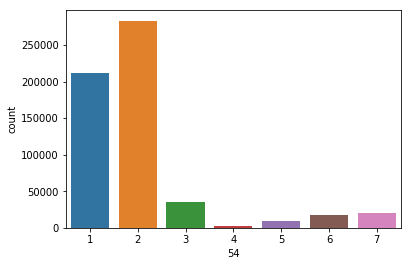

In [8]:
sns.countplot(covtype_Data[54], orient='v');

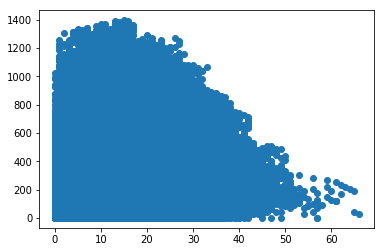

In [9]:
plt.scatter(covtype_Data[2], covtype_Data[3])

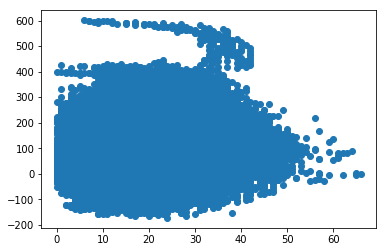

In [10]:
plt.scatter(covtype_Data[2], covtype_Data[4])

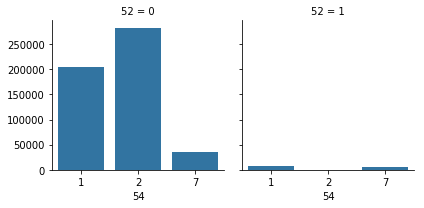

In [11]:
g = sns.FacetGrid(covtype_Data, col=52)
g = g.map(sns.countplot, 54) 

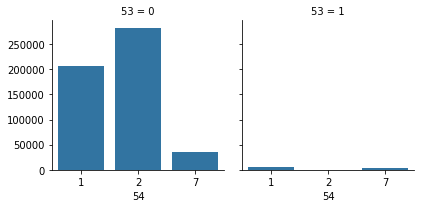

In [12]:
g = sns.FacetGrid(covtype_Data, col=53)
g = g.map(sns.countplot, 54) 

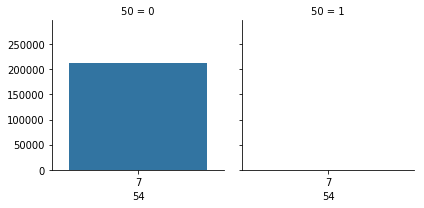

In [13]:
g = sns.FacetGrid(covtype_Data, col=50)
g = g.map(sns.countplot, 54) 

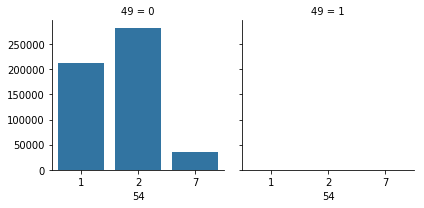

In [14]:
g = sns.FacetGrid(covtype_Data, col=49)
g = g.map(sns.countplot, 54) 

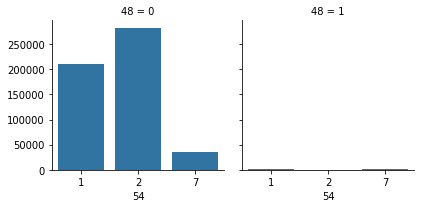

In [15]:
g = sns.FacetGrid(covtype_Data, col=48)
g = g.map(sns.countplot, 54) 

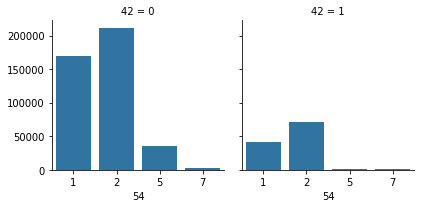

In [16]:
g = sns.FacetGrid(covtype_Data, col=42)
g = g.map(sns.countplot, 54) 

In [17]:
#visualizer = FeatureCorrelation(labels=features, method='mutual_info-classification', sort=True)
#visualizer.fit(train_data, train_label)
#visualizer.poof()

In [18]:
features = covtype_Data.columns[:10]
features

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

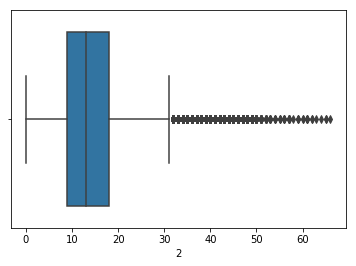

In [19]:
sns.boxplot(x=covtype_Data[2]);

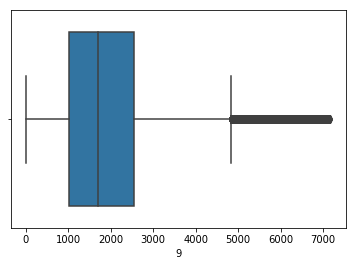

In [20]:
sns.boxplot(x=covtype_Data[9]);

In [21]:
z = np.abs(stats.zscore(covtype_Data[features]))
print(z)

[[1.29780509 0.93515698 1.48281978 ... 0.43914331 0.1429604  3.24628306]
 [1.31923485 0.89047967 1.61636259 ... 0.59089851 0.22134157 3.20550354]
 [0.5549068  0.14883628 0.68156292 ... 0.74265371 0.19669136 3.1269652 ]
 ...
 [2.04784663 0.02987297 0.38677957 ... 0.89440891 0.32732665 0.85054846]
 [2.05498988 0.12816306 0.11969395 ... 1.09674918 0.01232511 0.8429967 ]
 [2.05856151 0.08348575 0.14739167 ... 1.04616411 0.03992901 0.83468976]]


In [22]:
threshold = 3
print(np.where(z > 3))

(array([     0,      1,      2, ..., 580958, 580959, 580960], dtype=int64), array([9, 9, 9, ..., 2, 2, 2], dtype=int64))


In [23]:
Q1 = covtype_Data[features].quantile(0.25)
Q3 = covtype_Data[features].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0     354.0
1     202.0
2       9.0
3     276.0
4      62.0
5    2222.0
6      33.0
7      24.0
8      49.0
9    1526.0
dtype: float64


In [24]:
#print(covtype_Data[features] < (Q1 - 1.5 * IQR)) |(covtype_Data[features] > (Q3 + 1.5 * IQR))

In [25]:
covtype_Data = covtype_Data[~((covtype_Data[features] < (Q1 - 1.5 * IQR)) |(covtype_Data[features] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index()
covtype_Data.shape

(472673, 56)

In [26]:
del covtype_Data['index']
covtype_Data.shape

(472673, 55)

In [27]:
x = covtype_Data.iloc[:,:-1].values
y = covtype_Data.iloc[:,54].values

In [28]:
x.shape, y.shape

((472673, 54), (472673,))

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=123)

In [30]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [31]:
lr  = LinearRegression(normalize=True)
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
y_pred = lr.predict(test_x)

In [33]:
tree = DecisionTreeRegressor()
tree.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
y_pred = tree.predict(test_x)

In [35]:
r2_score(y_pred,test_y)

0.8086912443215374